# Unsupervised Learning
- K-Means clustering

This technique is one of the fundamentals in unsupervised learning. It is used when we want to figure out if there is any hidden pattern inside our unlabelled data. Remember in unsupervised learning, we only have the features input X without the target value y to do prediction. Therefore, k-Means algorithm can be used to cluster our data points into certain groups if these data points share similarity in any form. 
As you can tell, we can also use this technique to identify anomaly in our dataset which are specific data points that do not resemble other data points. The object of this algorithm is to find certain number of `centroids` so that it achieves the smallest distance between all the data points and its corresponding `centroids`. However, the number of centroids is something we need to manually inspect and give to the algorithm. Once given the number of `centroids`, the algorithm can return the most efficient output to assign the data points to appropriate `centroids`. 

<center><img src='./assets/knn.png' width="800"></center>

Two applications we are going to explore in this lesson are clustering iris dataset and image segmentation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

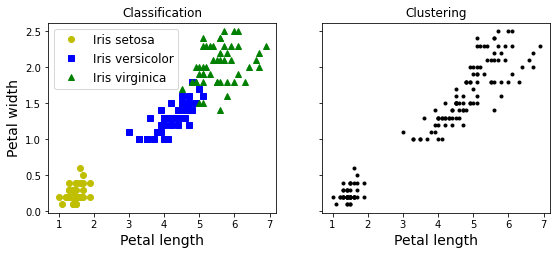

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.title("Classification")
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(122)
plt.title("Clustering")
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)


plt.show()

In [4]:
X.shape

(150, 4)

In [5]:
#Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [6]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

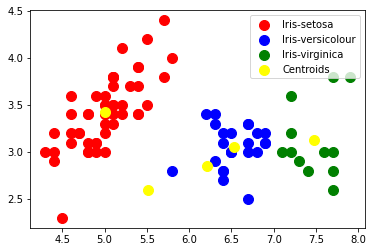

In [7]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

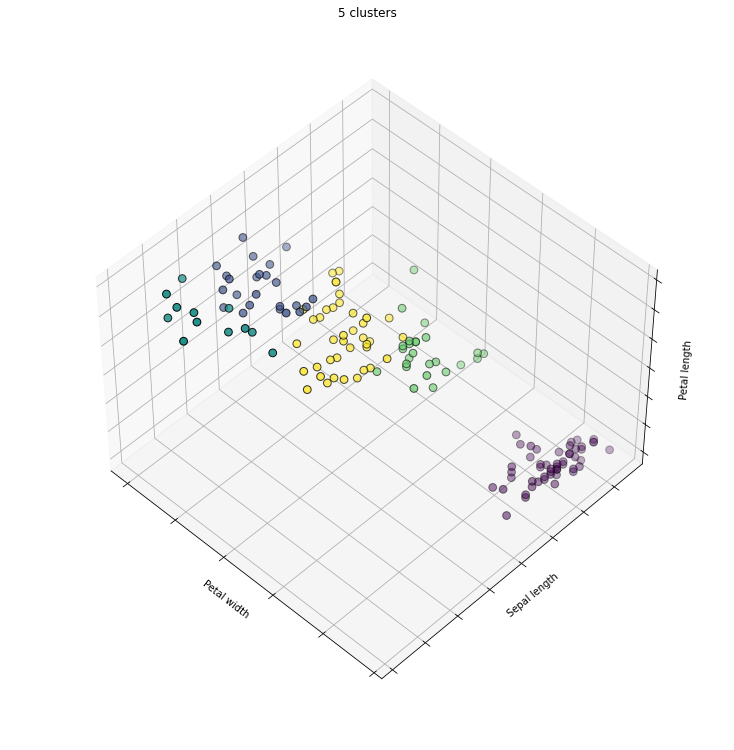

In [8]:
def plot_k_clusters(estimator, n_clusters=3):

    
    titles = str(n_clusters) + " clusters"

    fig = plt.figure(figsize=(15, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    labels = estimator.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k', s=60)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles)
    ax.dist = 12
    plt.show()

plot_k_clusters(kmeans, 5)

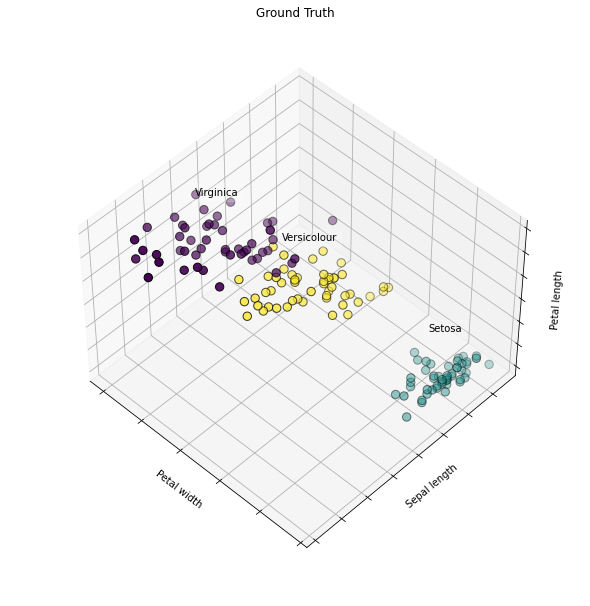

In [9]:
# Plot the ground truth
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y.astype(np.int), [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k', s= 70)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

#### Image Segmentation with K-Means

In [10]:
import os
from matplotlib.image import imread 

image = imread(os.path.join("images","awww.png"))
image.shape

(705, 996, 4)

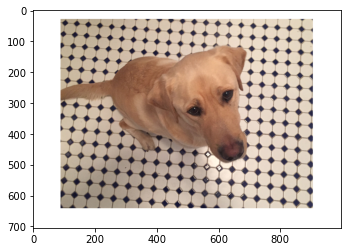

In [11]:
plt.imshow(image)

In [12]:
X = image.reshape(-1, 4)
kmeans = KMeans(n_clusters=2).fit(X)



In [13]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

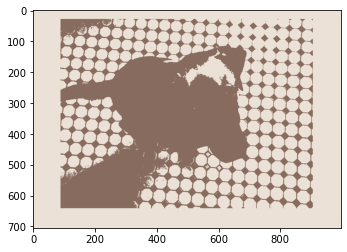

In [14]:
plt.imshow(segmented_image)